<a href="https://colab.research.google.com/github/amomen1218/python-for-remote-sensing/blob/main/spatial_raster_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)
X

(array([[-90., -54., -18.,  18.,  54.,  90.],
        [-90., -54., -18.,  18.,  54.,  90.],
        [-90., -54., -18.,  18.,  54.,  90.],
        [-90., -54., -18.,  18.,  54.,  90.],
        [-90., -54., -18.,  18.,  54.,  90.],
        [-90., -54., -18.,  18.,  54.,  90.]]),
 array([[ 90.,  90.,  90.,  90.,  90.,  90.],
        [ 54.,  54.,  54.,  54.,  54.,  54.],
        [ 18.,  18.,  18.,  18.,  18.,  18.],
        [-18., -18., -18., -18., -18., -18.],
        [-54., -54., -54., -54., -54., -54.],
        [-90., -90., -90., -90., -90., -90.]]))

Let's generate some data representing temperature and store it an array `Z`

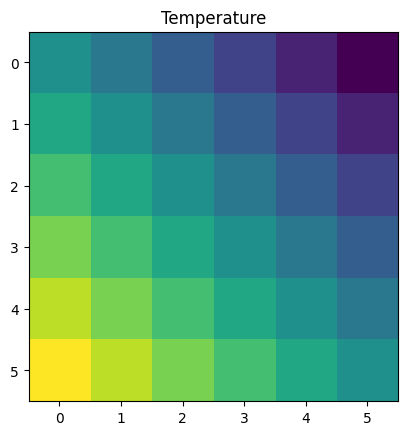

In [22]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 1) ** 2 + (Y - 1) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 1) ** 2 + (Y + 1) ** 2) / 1 ** 2)
Z =  (Z1 - Z2)

plt.imshow(Z)
plt.title("Temperature")
plt.show()

In [28]:
!pip install rasterio
from rasterio.transform import Affine
import rasterio as rio

res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

# open in 'write' mode, unpack profile info to dst
with rio.open(
    "../temp/new_raster.tif",
    "w",
    driver="GTiff",         # output file type
    height=Z.shape[0],      # shape of array
    width=Z.shape[1],
    count=1,                # number of bands
    dtype=Z.dtype,          # output datatype
    crs="+proj=latlong",    # CRS
    transform=transform,    # location and resolution of upper left cell
) as dst:
    # check for number of bands
    if dst.count == 1:
        # write single band
        dst.write(Z, 1)
    else:
        # write each band individually
        for band in range(len(Z)):
            # write data, band # (starting from 1)
            dst.write(Z[band], band + 1)

In [26]:
import os

# Create the directory if it doesn't exist
os.makedirs("../temp", exist_ok=True)

# ... (rest of your code) ...

In [27]:
from rasterio.transform import Affine
import rasterio as rio

res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

# open in 'write' mode, unpack profile info to dst
with rio.open(
    "../temp/new_raster.tif",
    "w",
    driver="GTiff",         # output file type
    height=Z.shape[0],      # shape of array
    width=Z.shape[1],
    count=1,                # number of bands
    dtype=Z.dtype,          # output datatype
    crs="+proj=latlong",    # CRS
    transform=transform,    # location and resolution of upper left cell
) as dst:
    # check for number of bands
    if dst.count == 1:
        # write single band
        dst.write(Z, 1)
    else:
        # write each band individually
        for band in range(len(Z)):
            # write data, band # (starting from 1)
            dst.write(Z[band], band + 1)

```{note}
Raster data is often 'multiband' (e.g. red, green, blue), so I provided code that works for both multiband and single band data.

If you are storing multiband data the dimensions should be stored as (band, y, x ).

Read more about this here: [Reading & Writing Rasters with Rasterio](e_new_rasters)
```